In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/Users/nlarusstone/.virtualenvs/bbcache/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sweeps = pd.read_csv('../eval/compas_sparsity-sbrl-sweeps.csv')#, sep=' ')
sweeps.set_index('CV_fold', inplace=True)
sweeps

,eta,lambda,num_rules,test_acc
CV_fold,,,,
compas_0,1,3,9,0.703190
compas_0,1,4,10,0.700416
compas_0,1,5,10,0.699029
compas_0,1,6,11,0.703190
compas_0,1,7,10,0.700416
compas_0,1,8,12,0.700416
compas_0,1,9,12,0.700416
compas_0,1,10,10,0.696255
compas_0,2,3,9,0.703190


In [30]:
eta = pd.DataFrame()
for i in range(1, 6):
    #print sweeps.where(lambda x: x['eta'] == i).describe().index
    mean = sweeps.where(lambda x: x['eta'] == i).mean()#.describe()).ix['mean':'std']
    mean = mean.rename('mean')
    std = sweeps.where(lambda x: x['eta'] == i).std()
    std = std.rename('std')
    eta = eta.append([mean, std])
lam = pd.DataFrame()
for i in range(3, 11):
    mean = sweeps.where(lambda x: x['lambda'] == i).mean()#.describe()).ix['mean':'std']
    mean = mean.rename('mean')
    std = sweeps.where(lambda x: x['lambda'] == i).std()
    std = std.rename('std')
    lam = lam.append([mean, std])
print eta.head()
print lam.head()

      eta    lambda  num_rules  test_acc
mean  1.0  6.500000  10.087500  0.672295
std   0.0  2.305744   0.930411  0.018502
mean  2.0  6.500000   9.600000  0.672937
std   0.0  2.305744   0.908469  0.017718
mean  3.0  6.500000   9.037500  0.672850
           eta  lambda  num_rules  test_acc
mean  3.000000     3.0   8.660000  0.673842
std   1.428571     0.0   0.823383  0.019414
mean  3.000000     4.0   8.600000  0.674147
std   1.428571     0.0   0.808122  0.018676
mean  3.000000     5.0   8.880000  0.672011


In [32]:
eta.to_csv('../eval/eta_sweeps.csv')
lam.to_csv('../eval/lambda_sweeps.csv')

In [ ]:
"""lam = pd.DataFrame()
for i in range(3, 11):
    mean = sweeps.where(lambda x: x['lambda'] == i).mean()#.describe()).ix['mean':'std']
    mean = mean.rename('mean')
    std = sweeps.where(lambda x: x['lambda'] == i).std()
    std = std.rename('std')
    lam = lam.append([mean, std])
print eta.head()
print lam.head()"""

In [79]:
idx = []
vals = []
for i in range(1, 6):
    #print sweeps.where(lambda x: x['eta'] == i).describe().index
    mean = sweeps.where(lambda x: x['eta'] == i).mean()['num_rules':]#.describe()).ix['mean':'std']
    mean = mean.rename('mean')
    std = sweeps.where(lambda x: x['eta'] == i).std()['num_rules':]
    std = std.rename('std')
    idx.extend([(i, 'mean'), (i, 'std')])
    vals.extend([mean, std])
index = pd.MultiIndex.from_tuples(idx, names=['value of eta', 'statistic'])
eta = pd.DataFrame(vals, index=index)
eta_means = eta.xs('mean', level='statistic')
eta_std = eta.xs('std', level='statistic')
eta

num_rules  test_acc
value of eta statistic                     
1            mean       10.087500  0.672295
             std         0.930411  0.018502
2            mean        9.600000  0.672937
             std         0.908469  0.017718
3            mean        9.037500  0.672850
             std         0.877911  0.018407
4            mean        8.512500  0.673370
             std         0.729032  0.017997
5            mean        8.162500  0.674549
             std         0.403897  0.018740

In [80]:
idx = []
vals = []
for i in range(3, 11):
    #print sweeps.where(lambda x: x['eta'] == i).describe().index
    mean = sweeps.where(lambda x: x['lambda'] == i).mean()['num_rules':]#.describe()).ix['mean':'std']
    mean = mean.rename('mean')
    std = sweeps.where(lambda x: x['lambda'] == i).std()['num_rules':]
    std = std.rename('std')
    idx.extend([(i, 'mean'), (i, 'std')])
    vals.extend([mean, std])
index = pd.MultiIndex.from_tuples(idx, names=['value of lambda', 'statistic'])
lam = pd.DataFrame(vals, index=index)
lam_means = lam.xs('mean', level='statistic')
lam_std = lam.xs('std', level='statistic')
lam

num_rules  test_acc
value of lambda statistic                     
3               mean        8.660000  0.673842
                std         0.823383  0.019414
4               mean        8.600000  0.674147
                std         0.808122  0.018676
5               mean        8.880000  0.672011
                std         0.917850  0.018242
6               mean        9.080000  0.673315
                std         1.006915  0.018125
7               mean        9.280000  0.673287
                std         1.050559  0.017934
8               mean        9.260000  0.672899
                std         1.258603  0.018324
9               mean        9.360000  0.673509
                std         1.083456  0.017808
10              mean        9.520000  0.672594
                std         1.110984  0.018234

In [59]:
eta.to_csv('../eval/eta_sweeps.csv')
lam.to_csv('../eval/lambda_sweeps.csv')

/Users/nlarusstone/.virtualenvs/bbcache/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


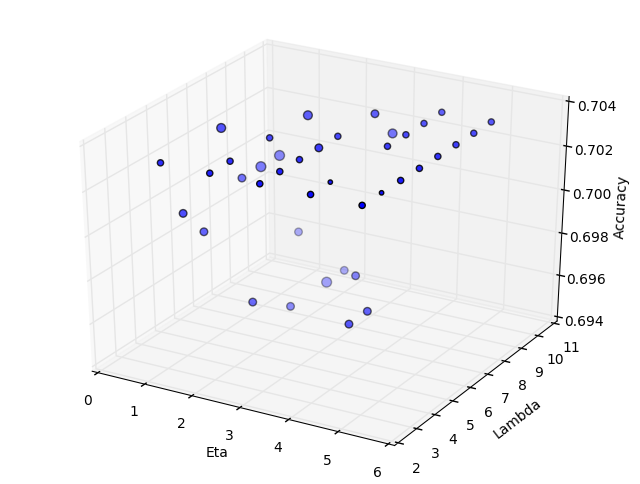

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
fold = sweeps.ix['compas_0']
min_size = min(fold['num_rules']) - 1
ax.scatter(fold['eta'], fold['lambda'], fold['test_acc'], s=(fold['num_rules'] - min_size) * 10)
ax.set_xlabel('Eta')
ax.set_ylabel('Lambda')
ax.set_zlabel('Accuracy')
plt.legend()
plt.show()

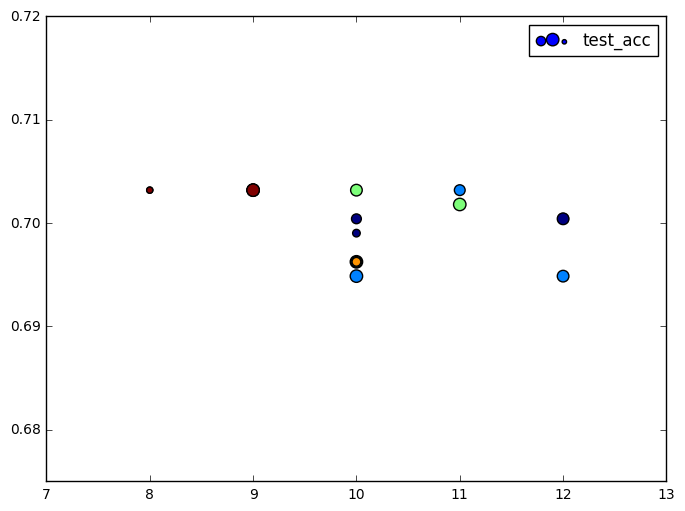

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
fold = sweeps.ix['compas_0']
ax.scatter(fold['num_rules'], fold['test_acc'], s=((fold['lambda'] - 2) * 10), c =fold['eta'])
ax.legend()
plt.show()

In [74]:
eta.index

MultiIndex(levels=[[1, 2, 3, 4, 5], [u'mean', u'std']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'value of eta', u'statistic'])

In [78]:
eta_means = eta.xs('mean', level='statistic')
eta_std = eta.xs('std', level='statistic')

,num_rules,test_acc
value of eta,,
1,10.0875,0.672295
2,9.6000,0.672937
3,9.0375,0.672850
4,8.5125,0.673370
5,8.1625,0.674549


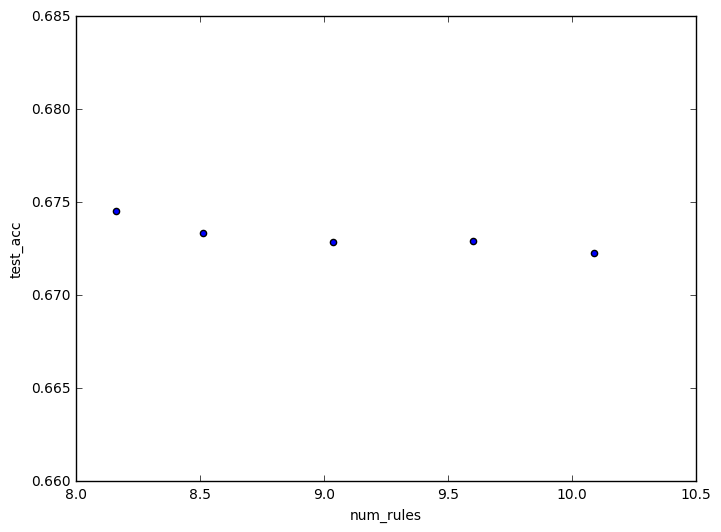

In [81]:
eta_means.plot.scatter(x='num_rules', y='test_acc', figsize=(8,6))
plt.show()

1
2
3
4
5


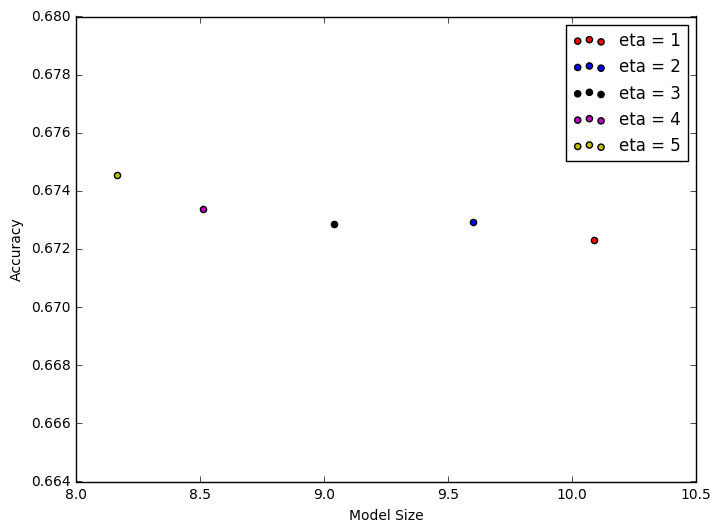

In [91]:
from matplotlib import colors as mcolors
colors = ['r', 'b', 'k', 'm', 'y']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#fold = sweeps.ix['compas_0']
for i, row in eta_means.iterrows():
    print i
    ax.scatter(row['num_rules'], row['test_acc'], c=colors[i - 1], label='eta = {0}'.format(i))
ax.set_xlabel('Model Size')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

3
4
5
6
7
8
9
10


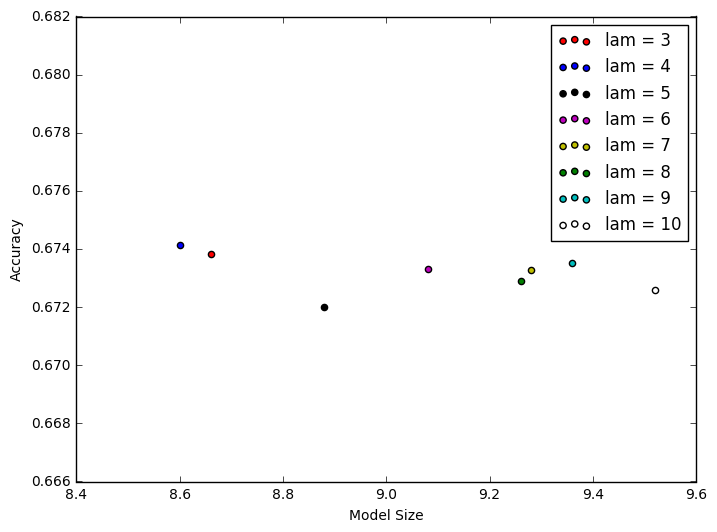

In [96]:
from matplotlib import colors as mcolors
colors = ['r', 'b', 'k', 'm', 'y', 'g', 'c', 'w']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#fold = sweeps.ix['compas_0']
for i, row in lam_means.iterrows():
    print i
    ax.scatter(row['num_rules'], row['test_acc'], c=colors[i - 3], label='lam = {0}'.format(i))
ax.set_xlabel('Model Size')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

In [99]:
fold = sweeps.ix['compas_0']
fold

,eta,lambda,num_rules,test_acc
CV_fold,,,,
compas_0,1,3,9,0.703190
compas_0,1,4,10,0.700416
compas_0,1,5,10,0.699029
compas_0,1,6,11,0.703190
compas_0,1,7,10,0.700416
compas_0,1,8,12,0.700416
compas_0,1,9,12,0.700416
compas_0,1,10,10,0.696255
compas_0,2,3,9,0.703190
